# 第2章 感知机

1．感知机是根据输入实例的特征向量$x$对其进行二类分类的线性分类模型：

$$
f(x)=\operatorname{sign}(w \cdot x+b)
$$

感知机模型对应于输入空间（特征空间）中的分离超平面$w \cdot x+b=0$。

2．感知机学习的策略是极小化损失函数：

$$
\min _{w, b} L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)
$$

损失函数对应于误分类点到分离超平面的总距离。

3．感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有原始形式和对偶形式。算法简单且易于实现。原始形式中，首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。
 
4．当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数$k$满足不等式：

$$
k \leqslant\left(\frac{R}{\gamma}\right)^{2}
$$

当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。


### 二分类模型
$f(x) = sign(w\cdot x + b)$

$\operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.$

给定训练集：

$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$

定义感知机的损失函数 

$L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$

---
#### 算法

随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$, $b$的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [3]:
import pandas as pd # 基于numpy,用于处理文本或者表格数据
import numpy as np  # numpy:Python中基于数组对象的科学计算库，支持大量的维度数组与矩阵运算，以及大量的数学函数库。
from sklearn.datasets import load_iris # 鸢尾花数据集,包含了3类鸢尾花的4个特征（萼片长度、萼片宽度、花瓣长度、花瓣宽度），共有150个样本。
import matplotlib.pyplot as plt # 绘图函数
# 官方给出的定义是：IPython有一组预先定义好的所谓的魔法函数（Magic Functions），你可以通过命令行的语法形式来访问它们。可见“%matplotlib inline”就是模仿命令行来访问magic函数的在IPython中独有的形式。
%matplotlib inline

In [ ]:
# load data
iris = load_iris()  # 加载数据集

# 创建一个 DataFrame 对象：二维表格型数据，含有一组有序的列，每列可以是不同的值类型。既有行索引，也有列索引。
# 将iris.data作为数据源，iris.feature_name(特征名称 每列的属性名，['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ）作为列名。
# print(iris.feature_names)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# iris.target:目标属性。品种信息
df['label'] = iris.target

In [23]:
# columns:列索引;index:行索引;shape:形状。
# print(df)
# print(df.shape)  #查看形状
# print(df.index)  #查看行索引
# print(df.columns) #查看列索引
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
# 0 1 2 代表不同的鸢尾花类型：仙鸢尾、变色鸢尾和维吉尼亚鸢尾。
df.label.value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

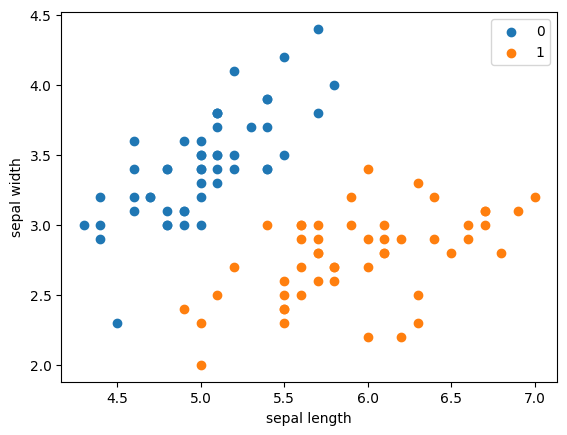

In [44]:
'''
matplotlib.pyplot.scatter(x, 
	y, 
	s=20, 
	c='b', 
	marker='o', 
	cmap=None, 
	norm=None, 
	vmin=None, 
	vmax=None, 
	alpha=None, 
	linewidths=None, 
	verts=None, 
	hold=None, 
	**kwargs)
'''
# 绘制散点图
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
# 添加标签
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()  # 添加图例

In [66]:
# iloc:通过索引行、列的索引位置[index, columns]来寻找值
'''
my_dict = [{'a':1,'b':2,'c':3,'d':4},{'a':10,'b':20,'c':30,'d':40},{'a':100,'b':200,'c':300,'d':400}]
df = pd.DataFrame(my_dict)
print(df)
print(df.iloc[:,1:-1])
print('')
print(df.iloc[:2,[1,-1]])
'''
# 选取前100行;0列，1列和-1(最后一列)；即'sepal length', 'sepal width'--萼片长度、萼片宽度，-1为lable,即类型标记
data = np.array(df.iloc[:100, [0, 1, -1]])
# print(len(data[0]) - 1)
# print(data[0])

2
[5.1 3.5 0. ]


In [55]:
# 选取除了最后一列之外的所有列变量作为X变量；选取最后一列列变量作为y变量
X, y = data[:,:-1], data[:,-1]

In [57]:
# 遍历y变量；如果值为1则赋值为1；如果只为其他(1,2),则赋值为-1。
y = np.array([1 if i == 1 else -1 for i in y])

## Perceptron（感知器）

In [3]:
# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        # np.ones()函数返回给定形状和数据类型的新数组，其中元素的值设置为1
        # np.ones(shape, dtype=None, order='C')
        # 1.shape：一个整数类型或者一个整数元组，用于定义数组的大小。如果仅指定一个整数类型变量，则返回一维数组。如果指定的是整数元组，则返回给定形状的数组。
        # 2.dtype：可选参数，默认值为float。用于指定数组的数据类型。
        # 3.order：指定内存重以行优先(‘C’)还是列优先(‘F’)顺序存储多维数组。

        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)    # 初始化W：flota32类型的数组。元素的值设置为1，大小为data行的大小减一，即'sepal length', 'sepal width'列
        self.b = 0  # 初始化b为0
        self.l_rate = 0.1   # 设置l_rate初始化为0.1
        # self.data = data

    # 类方法必须包含参数self, 且为第一个参数，self代表的是类的实例（将类应用在实例场景之中）。
    def sign(self, x, w, b):
        y = np.dot(x, w) + b    # y = X * W + b; dot() 可以理解为矩阵乘法
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong: # 当is_wrong为False时循环；当is_wrong为True时退出循环
            wrong_count = 0
            for d in range(len(X_train)):   # 遍历
                X = X_train[d]  # 当perceptron.fit(X, y)调用时，取X的d行元素
                y = y_train[d]  # 当perceptron.fit(X, y)调用时，取y的d位置数据
                # 当实例点被误分类，即位于分离超平面的错误侧，则调整w, b的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类
                if y * self.sign(X, self.w, self.b) <= 0:   # 如果 y 和 X*W+b 的结果不同，则做以下更新
                    self.w = self.w + self.l_rate * np.dot(y, X)    # W = W + l_rate * (y[i] * X[i])    $w = w + \eta y_{i}x_{i}$
                    self.b = self.b + self.l_rate * y   # b = b + l_rate * y[i]  $b = b + \eta y_{i}$
                    wrong_count += 1    # 错误次数 + 1
            if wrong_count == 0:    # 如果全部分类成功，退出
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

In [86]:
perceptron = Model()  # 创建Model类,并命名为perceptron
perceptron.fit(X, y)  # 调用fit()

'''
    print(len(X))
    X_test = X[0]
    print(X_test)
    y_test = y[0]
    print(y_test)
    w_test = np.dot(y_test, X_test)
    print(w_test)
'''

'\n    print(len(X))\n    X_test = X[0]\n    print(X_test)\n    y_test = y[0]\n    print(y_test)\n    w_test = np.dot(y_test, X_test)\n    print(w_test)\n'

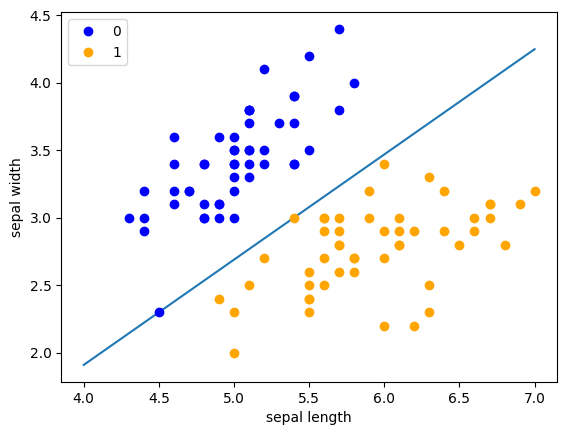

In [96]:
# linspace() 定义均匀间隔创建数值序列 numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0) num:生成的样本数；endpoint：是否包含stop的值
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1] # y_ =  -( W[0] * x_points + b ) / w[1]
# plt.plot(x, y, fmt='xxx', linestyle=, marker=, color=, linewidth=, markersize=, label=, ) 格式字符串fmt：fmt由'[marker][line][color]'即标记、线形、颜色三部分组成，可打乱顺序。
plt.plot(x_points, y_)  # 画出该直线

plt.plot(data[:50, 0], data[:50, 1], 'o', color='blue', label='0') # bo:蓝色实心圆,'bo', color='blue' 会造成颜色冗余定义，此处删除
plt.plot(data[50:100, 0], data[50:100, 1], 'o', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### scikit-learn实例

In [101]:
# https://scikit-learn.org.cn/view/855.html
import sklearn
from sklearn.linear_model import Perceptron

In [102]:
sklearn.__version__

'1.5.0'

In [ ]:
# sklearn.linear_model.Perceptron感知机模型
# fit_intercept：是否对参数 截距项b进行估计， 若为False则数据应是中心化； max_iter ： 最大迭代次数，哪怕损失函数依旧大于0； shuffle ： 每轮训练后是否打乱数据。
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000, 
                 shuffle=True)
clf.fit(X, y)   # 调用梯度下降进行训练

In [111]:
# Weights assigned to the features. 分配给特征权重
print(clf.coef_)  # coef_:输出训练后的模型参数w的数组，不包含截距项b。当为二分类时，该数组shape=(1,n)，n为特征数量。当为多分类时shape=（k, n)

[[ 23.2 -38.7]]


In [112]:
# 截距 Constants in decision function.
print(clf.intercept_)  # intercept_:输出训练后的模型截距b的数组。当为二分类时，该数组shape=(1,)。当为多分类时shape=（k, )

[-5.]


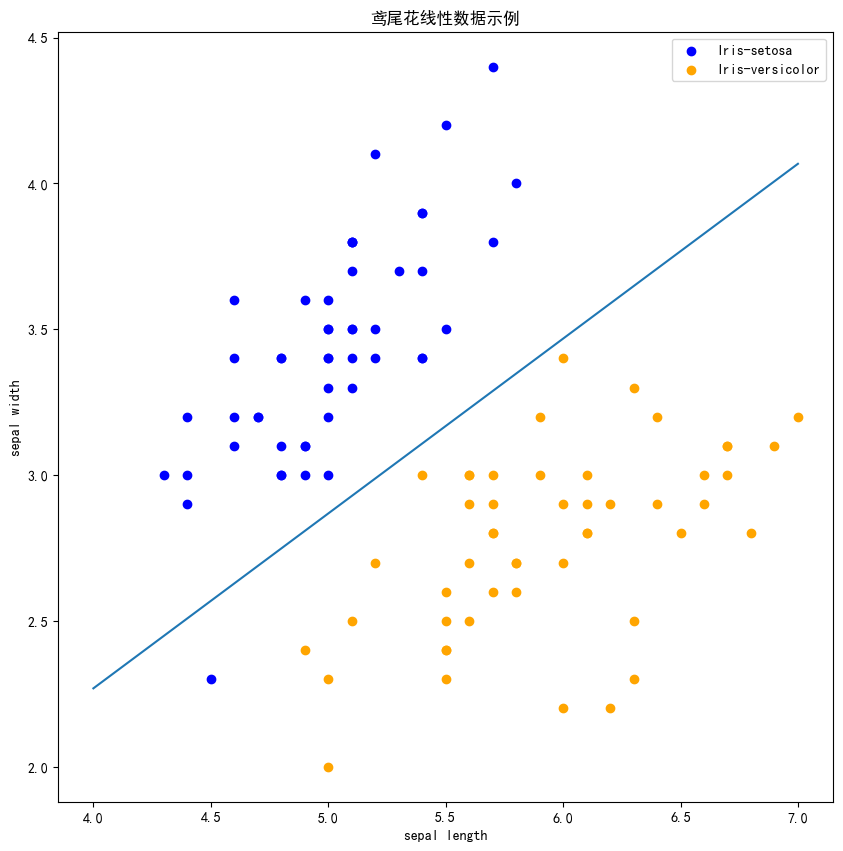

In [115]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']  # 运行配置参数中的字体（font）为黑体（SimHei）
plt.rcParams['axes.unicode_minus'] = False  # 减号使用编码格式：如果设置为True（默认值），则使用Unicode字符U+2212表示负号，这个字符比ASCII字符U+002D更长，如果设置为False，则使用ASCII字符U+002D表示负号，这个字符可能与减号混淆。³
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)  # np.arange(start, stop, step, dtype)   起始值，默认为0; 终止值（不包含）; 步长，默认为1; 返回ndarray的数据类型，如果没有提供，则会使用输入数据的类型。
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]   # 该直线的表示方程
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格,默认是关闭的
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

**注意 !**

在上图中，有一个位于左下角的蓝点没有被正确分类，这是因为 SKlearn 的 Perceptron 实例中有一个`tol`参数。

`tol` 参数规定了如果本次迭代的损失和上次迭代的损失之差小于一个特定值时，停止迭代。所以我们需要设置 `tol=None` 使之可以继续迭代：

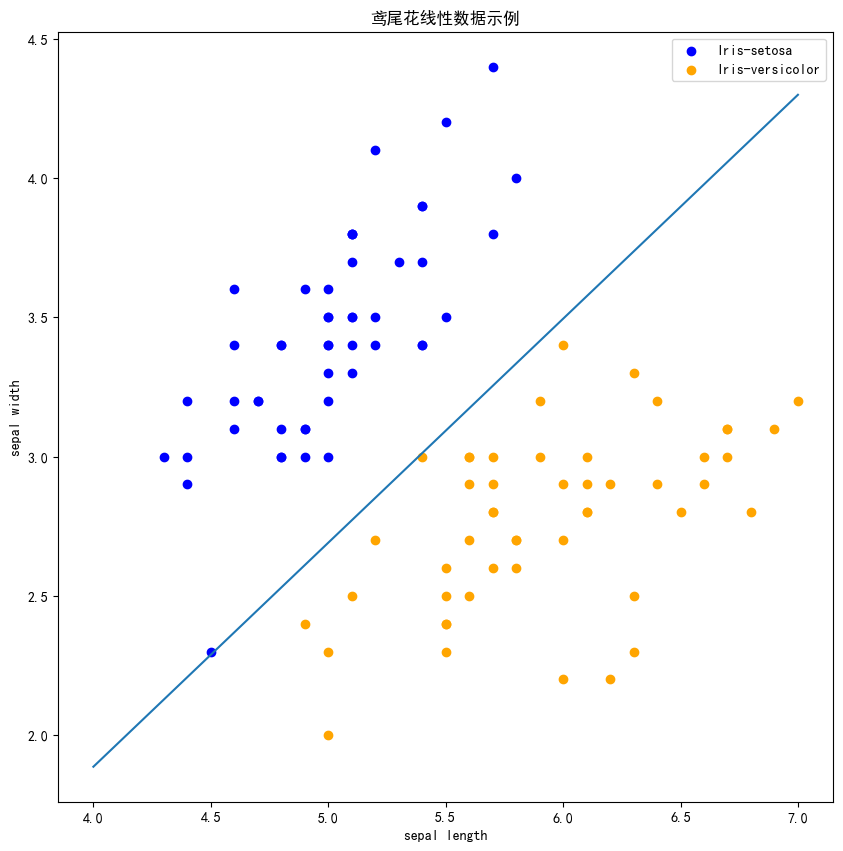

In [116]:
# tol:	迭代停止的标准。如果不为None，那么当loss-pre-loss<tol的时候，就会停止迭代。因为当前迭代造成的损失函数下降太小了，迭代下去对loss影响不大了。
clf = Perceptron(fit_intercept=True, 
                 max_iter=1000,
                 tol=None,
                 shuffle=True)
clf.fit(X, y)

# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

# 画感知机的线
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

# 其他部分
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

现在可以看到，所有的两种鸢尾花都被正确分类了。

----

## 第2章感知机-习题

### 习题2.1
&emsp;&emsp;Minsky 与 Papert 指出：感知机因为是线性模型，所以不能表示复杂的函数，如异或 (XOR)。验证感知机为什么不能表示异或。

**解答：**  

对于异或函数XOR，全部的输入与对应的输出如下：  

|<div style="width:20px">$x^{(1)}$</div>|<div style="width:20px">$x^{(2)}$</div>|$y$|
|:-: | :-: | :-: |  
| &nbsp;1 |  &nbsp;1 |-1 | 
| &nbsp;1 | -1 | &nbsp;1 | 
|-1 |  &nbsp;1 | &nbsp;1 | 
|-1 | -1 |-1 | 

参考代码：https://github.com/wzyonggege/statistical-learning-method

本文代码更新地址：https://github.com/fengdu78/lihang-code

习题解答：https://github.com/datawhalechina/statistical-learning-method-solutions-manual

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)